To get started, we can perform linear regression using linear algebra. Assume a model of $y=\theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n$. $\theta_0$ is the bias term. The typical performance metric is mean square error: $E( \Theta )=\frac{1}{m}\sum_{i=1}^m (\Theta^T x^{(i)}-y^{(i)})$, where $\Theta = [\theta_0 \ \cdots \ \theta_n]$.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = 1.6 * np.random.rand(500,1)
y = 1.5 + 2.25 * X + np.random.randn(500,1) # theta_0 = 1.5, theta_1 = 2.25

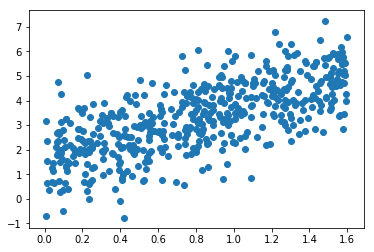

In [19]:
%matplotlib inline
plt.scatter(X,y)
plt.show()

By taking all data instances, $x^{(i)}$, and their target values, $y^{(i)}$, we can compute the parameters using the closed form equation:
$\hat{\Theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$

In [20]:
X_b = np.c_[np.ones((500,1)), X] # Adds the bias term, x_0 = 1

In [22]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [23]:
# We get something pretty close to the function that generated this data.
theta

array([[1.59802691],
       [2.11612952]])

In [24]:
# Test the predictions
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [27]:
y_predict = X_new_b.dot(theta)
y_predict

array([[1.59802691],
       [5.83028594]])

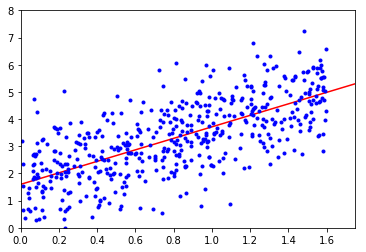

In [29]:
# Plot it
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,1.75,0,8])
plt.show()

In [31]:
# We can do the same with sklearn linear regression.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X,y)

/Users/pjmartin/Code/python-ml-sandbox/env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print("Model: " + str(linreg.coef_) + "x + " + str(linreg.intercept_))

Model: [[2.11612952]]x + [1.59802691]


In [33]:
linreg.predict(X_new)

array([[1.59802691],
       [5.83028594]])